simulname is None
args (['apero', '[498,748,1449,1699,[1,100,1]]', '1270'],)
args[0] ['apero', '[498,748,1449,1699,[1,100,1]]', '1270']
len(args[0]) 3
time of simulation is: 1270
coord
loading /home/datawork-lops-osi/mlecorre/POLGYR/INIT/polgyr_grd.nc
loading /home/datawork-lops-osi/mlecorre/POLGYR/HIS/polgyr_his.01260.nc
get domain [498,748,1449,1699,[1,100,1]] [498,
coordmax
loading /home/datawork-lops-osi/mlecorre/POLGYR/INIT/polgyr_grd.nc
loading /home/datawork-lops-osi/mlecorre/POLGYR/HIS/polgyr_his.01260.nc
get domain [0,1e9,0,1e9,[1,1e9,1]] [0,1e
cst
read Cs_r in ncfile.Cs_r
dt
dt is read in  /home/datawork-lops-osi/mlecorre/POLGYR/HIS/polgyr_his.01260.nc


<ipython-input-3-cefd5431872d>:89: UserWarning: The following kwargs were not used by contour: 'zdir', 'offset'
  cf = plt.contourf(lon, lat, vrt[:,:,-0],


simulname is None
args (['apero', '[498,748,1449,1699,[1,100,1]]', '1340'],)
args[0] ['apero', '[498,748,1449,1699,[1,100,1]]', '1340']
len(args[0]) 3
time of simulation is: 1340
coord
loading /home/datawork-lops-osi/mlecorre/POLGYR/INIT/polgyr_grd.nc
loading /home/datawork-lops-osi/mlecorre/POLGYR/HIS/polgyr_his.01340.nc
get domain [498,748,1449,1699,[1,100,1]] [498,
coordmax
loading /home/datawork-lops-osi/mlecorre/POLGYR/INIT/polgyr_grd.nc
loading /home/datawork-lops-osi/mlecorre/POLGYR/HIS/polgyr_his.01340.nc
get domain [0,1e9,0,1e9,[1,1e9,1]] [0,1e
cst
read Cs_r in ncfile.Cs_r
dt
dt is read in  /home/datawork-lops-osi/mlecorre/POLGYR/HIS/polgyr_his.01340.nc
(250, 250)
simulname is None
args (['apero', '[498,748,1449,1699,[1,100,1]]', '1330'],)
args[0] ['apero', '[498,748,1449,1699,[1,100,1]]', '1330']
len(args[0]) 3
time of simulation is: 1330
coord
loading /home/datawork-lops-osi/mlecorre/POLGYR/INIT/polgyr_grd.nc
loading /home/datawork-lops-osi/mlecorre/POLGYR/HIS/polgyr_his.013

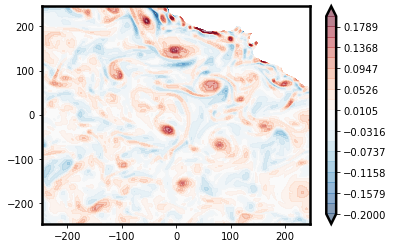

In [3]:

from netCDF4 import Dataset
import numpy as np
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import sys
sys.path.append("/home2/datahome/tpicard/PhD_MOMOPAR/Presentation_plot/")
sys.path.append("../")
from plot_function import *
#from variables_create_data import *

folder_in_pyticle = "/home/datawork-lemar-apero/tpicard/PYTICLE/"

tend = 1370
t0 = tend-120
file = folder_in_pyticle + 'apero_trap3000m_wsed100_2000dx_100nx_00{0}_00{1}.nc'.format(t0,tend) #AC?
number_of_exp = 0

#List of the 36 sub-patches centers 
ic_all_list = np.linspace(1520.5,1610.5,6)
jc_all_list = np.linspace(569.5,659.5,6)
i_ic = 3
i_jc = 3

nc = Dataset(file, 'r')


part_x = nc.variables['px'][:,:]
part_y = nc.variables['py'][:,:]
pdepth = nc.variables['pdepth'][:,:] #(dt,nb_particle)

[ic,jc] = [ic_all_list[i_ic],  jc_all_list[i_jc]]

#[ic,jc] = np.load('/home2/datahome/tpicard/Pyticles/Inputs/ic_jc.npy')

index_part = spatial_filter(part_x,part_y,ic,jc,number_of_exp) #Filtre spatial #0, 20 ou 40

part_x = part_x[:,index_part]
part_y = part_y[:,index_part]
pdepth = pdepth[:,index_part] #(dt,nb_particle)

dx, dy = 1.979, 1.979 #grid size
npart_trap = pdepth.shape[1]

x_disp = []
y_disp = []
time = []

#list_level = [2500,2000,1500,1000,200]
list_level = [3000,2000,1000,200]
x_disp_level = np.zeros((len(list_level),720))
y_disp_level = np.zeros((len(list_level),720))

l = 0
for level in list_level:
    x_disp =[]
    y_disp=[]
    for ipart in range(npart_trap):

        index_realtime = np.where( pdepth[:,ipart] != 0 )[0] # find the period when particles are released

        if index_realtime.size != 0:# check if particles are released
            pdepth_tmp = pdepth[index_realtime,ipart]
            index_200m = np.argmax(pdepth_tmp > -level)


            if index_200m != 0: # particles have reached upper -200 m            
                index_200m = np.round(index_realtime[index_200m])
                x_disp.append( (part_x[index_200m, ipart]-ic )*dx ) #difference pour avoir un schéma centré
                y_disp.append( (part_y[index_200m, ipart]-jc)*dy )
                time.append(index_200m)

    x_disp_level[l,:]=np.array(x_disp)
    y_disp_level[l,:]=np.array(y_disp)
    l=l+1



#plot_pdf_200m(830-30,int(ic),int(jc),x_disp_level[-1,:],y_disp_level[-1,:],npart_trap)

#t0 = time[0]

tstart = tend-100 
nb_dt = tend-tstart
(lon,lat,vrt) = plot_background_level(int(ic),int(jc),tstart,list_level)

levels_vrt=np.linspace(-0.2,0.2,20)

cf = plt.contourf(lon, lat, vrt[:,:,-0],
        zdir='z', offset=-list_level[0],cmap = plt.cm.RdBu_r,alpha = 0.5,vmin=-0.2,vmax=0.2,levels=levels_vrt,extend='both')

#cb = plt.colorbar(cf, location='left', pad=0.05,shrink=0.5)
#cb.set_label(r'$\zeta/f$',fontsize=18)
#cb.ax.tick_params(labelsize=16)
plt.colorbar()

vrt = np.zeros((250,250,len(list_level)))

for i in range(len(list_level)):
    time_i = tend-number_of_exp-30-i*10
    level = list_level[i]
    #vrt[:,:,i]=plot_background_level_time(int(ic),int(jc),time_i,level)
    (lon,lat,vrt[:,:,i]) = plot_background_level_time(int(ic),int(jc),time_i,level)


<ipython-input-4-546da4de766e>:131: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = fig.colorbar(cf,  ax=[ax], location='bottom', pad=-.1,shrink=0.5,extend='both',ticks=[-0.2,0,0.2])


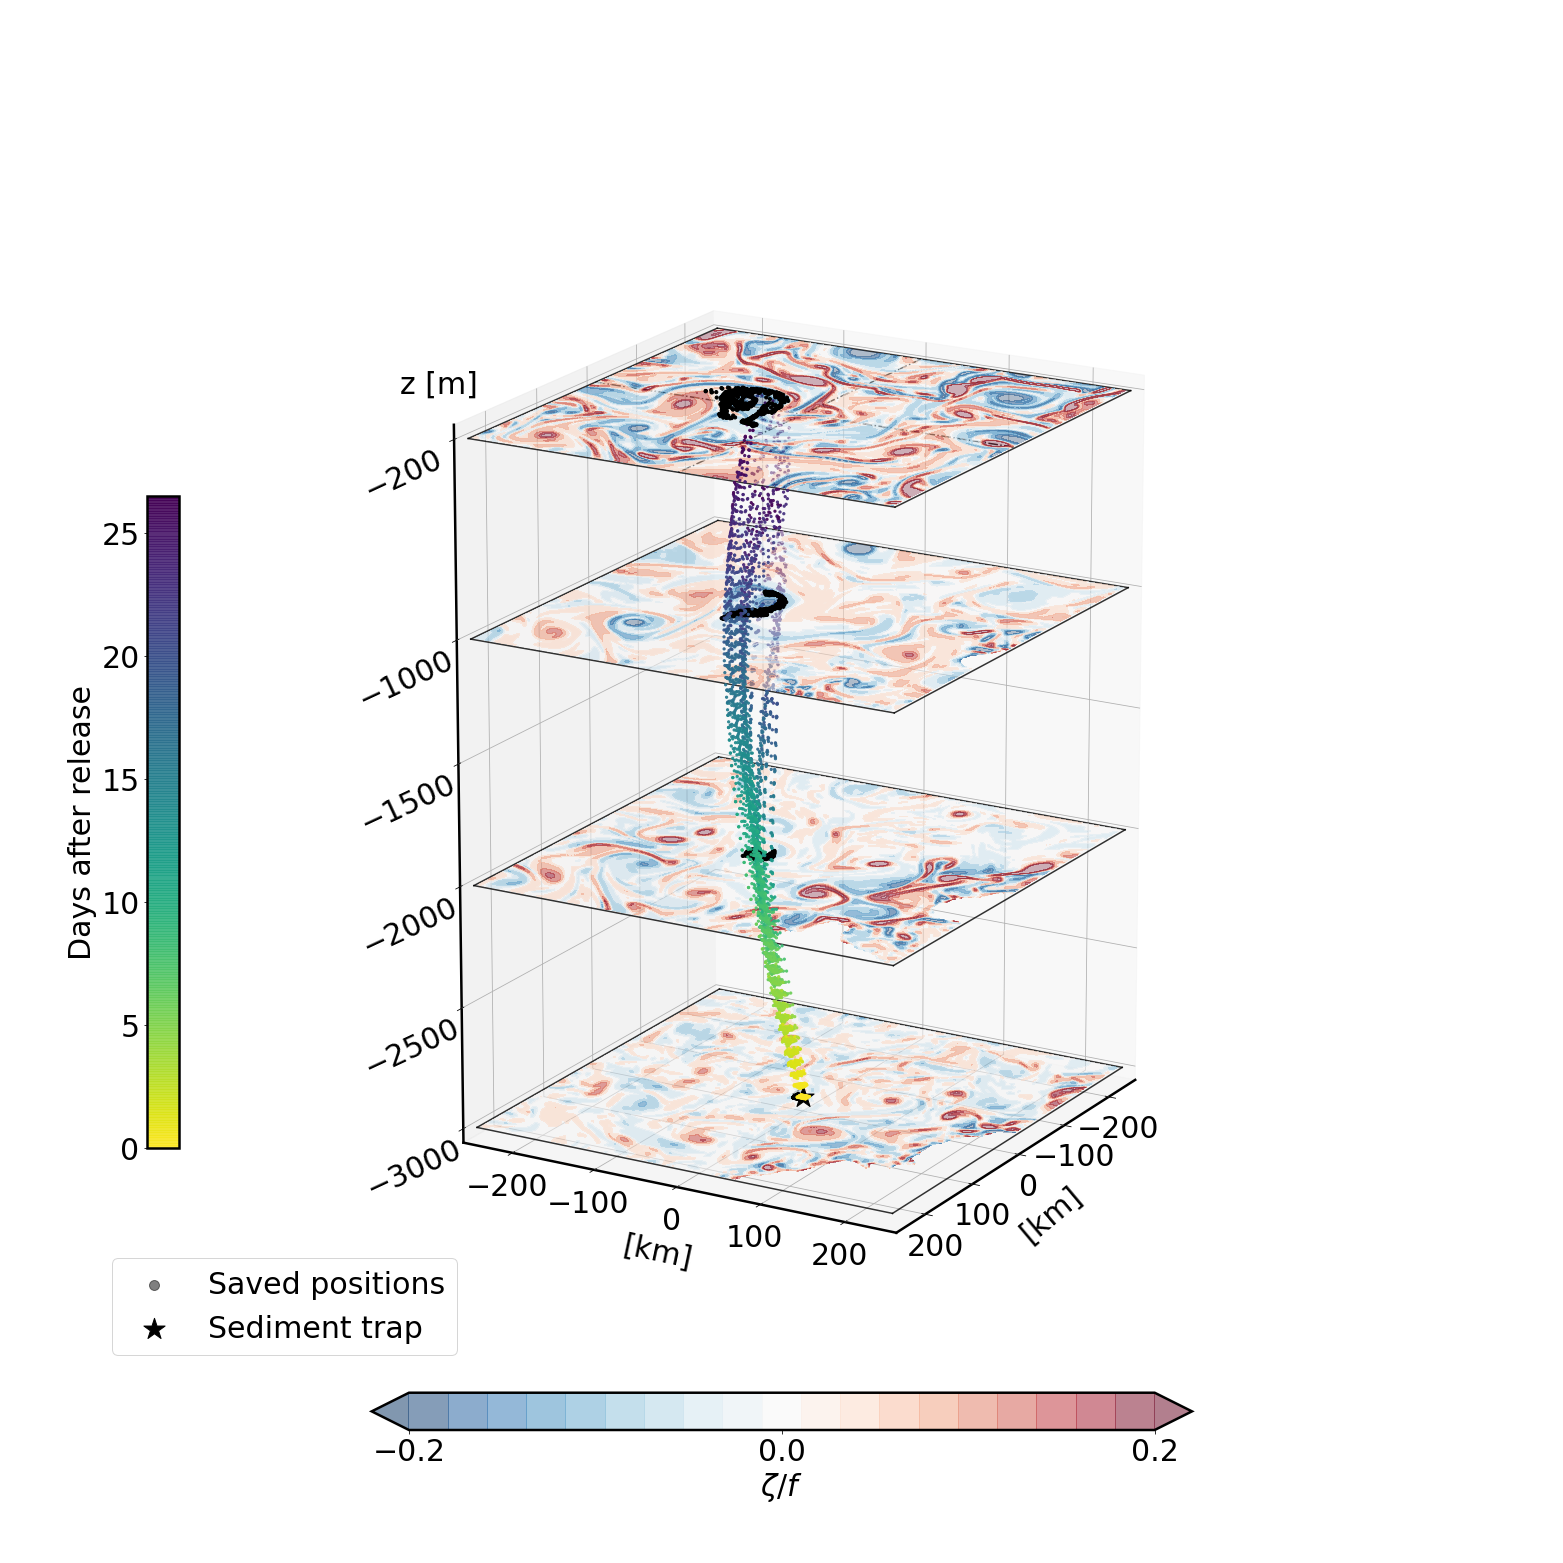

In [4]:

from mpl_toolkits.mplot3d.axes3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

"""                                                                                                                                                    
Scaling is done from here...                                                                                                                           
"""
x_scale=2
y_scale=2
z_scale=4

scale=np.diag([x_scale, y_scale, z_scale, 1.0])
scale=scale*(1.0/scale.max())
scale[3,3]=1.0

def short_proj():
    return np.dot(Axes3D.get_proj(ax), scale)


#for i in range(len(list_level)):
#    plot_pdf_level(tend-number_of_exp-20-i*10,int(ic),int(jc),x_disp_level[i,:],y_disp_level[i,:],npart_trap,list_level,i,0.2+(i*0.1))

#PLOT 3D
labelsize = 30
labelpad = 40 
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from IPython.display import clear_output
import matplotlib.cm as cm

size_part = 10

px_filter = np.ma.masked_where(pdepth > -200,part_x)
py_filter = np.ma.masked_where(pdepth > -200,part_y)

zline = np.linspace(-3000, -200, 8)
zx = np.zeros(100)
xline = np.linspace(-250, 250, 250)
#xz = np.zeros(250)-200
xz = np.zeros(250)
xz_300 = np.zeros(250)-300
xy = np.zeros(250)
yline = np.linspace(-250, 250, 250)

data = [(px_filter[:,0]-part_x[0,0],
         py_filter[:,0]-part_y[0,0], pdepth[:,0])]


fig, ax = plt.subplots(1,1,figsize=(30,30))
ax = plt.axes(projection='3d')
ax.get_proj=short_proj
plt.xticks(size=16)
plt.yticks(size=16)
ax.tick_params(axis='both',labelsize=labelsize,pad=10)
ax.set_xlim(-500, 500)
ax.set_ylim(-500,500)
zline = np.linspace(-1000, 0, 100)
ax.set_xlim(-250, 250)
ax.set_ylim(-250,250)
ax.set_zlim(-3000,-200)
ax.set_xlabel('[km]',labelpad=labelpad,size=labelsize,rotation=40)
ax.set_ylabel('[km]',labelpad=labelpad,size=labelsize,rotation=-12)
ax.zaxis.set_tick_params(labelsize=labelsize,pad=50,rotation=25)
ax.set_zticks(np.array([-3000,-2500,-2000,-1500,-1000,-200]))


ax.plot3D(xline, xy, xz-200, 'k',linestyle='-.',alpha=1)
ax.plot3D(xy, yline, xz-200, 'k',linestyle='-.',alpha=0.8)


nb_part = pdepth.shape[1]
clear_output(wait=True)

levels_vrt=np.linspace(-0.3,0.3,20)
levels_vrt_pos=np.linspace(0,0.3,10)
levels_vrt_neg=np.linspace(-0.3,0,10)

ax.scatter3D(x_disp_level[0,0], y_disp_level[0,0], -list_level[0], color='k',s =100, marker='o',alpha =0.5,edgecolors=None,label='Saved positions');

vrt_lim = 0.15
alpha_vrt=0.3

    
for i in range(len(list_level)):



    levels_vrt=np.linspace(-vrt_lim,vrt_lim,10)
    cp  = ax.contourf(lon, lat, vrt[:,:,i],
    zdir='z', offset=-list_level[i],cmap = plt.cm.RdBu_r,alpha = alpha_vrt,vmin=-vrt_lim,vmax=vrt_lim,levels=levels_vrt,extend='min')

    cp  = ax.contourf(lon, lat, vrt[:,:,i],
    zdir='z', offset=-list_level[i],cmap = plt.cm.RdBu_r,alpha = alpha_vrt,vmin=-vrt_lim,vmax=vrt_lim,levels=levels_vrt,extend='max')
    
    ax.scatter3D(x_disp_level[i,::1], y_disp_level[i,::1], -list_level[i], color='k',s =size_part, marker='o',alpha =1,edgecolors=None);


for i in range(len(list_level)):

    ax.plot3D(xy-250, yline, xz-list_level[i], 'k',linestyle='-',alpha=0.8)
    ax.plot3D(xy+250, yline, xz-list_level[i], 'k',linestyle='-',alpha=0.8)
    ax.plot3D(xline, xy-250, xz-list_level[i], 'k',linestyle='-',alpha=0.8)
    ax.plot3D(xline, xy+250, xz-list_level[i], 'k',linestyle='-',alpha=0.8)

ax.view_init(18, 30)

cm = plt.cm.get_cmap('viridis_r')

nb_half_days = number_of_exp+ 60

xy = range(60-2)
z = xy


for i in range(0,nb_part-36,10):

    ax.scatter3D((px_filter[number_of_exp+2:nb_half_days,i]-ic)*2, (py_filter[number_of_exp+2:nb_half_days,i]-jc)*2, pdepth[number_of_exp+2:nb_half_days,i], c=z,s = size_part-5, marker='o',alpha =0.9,cmap=cm)
    #pass
sc = ax.scatter3D((px_filter[number_of_exp+2:nb_half_days,0]-ic)*2, (py_filter[number_of_exp+2:nb_half_days,0]-jc)*2, pdepth[number_of_exp+2:nb_half_days,0], c=z,s = size_part-5, marker='o',alpha =0.9,cmap=cm)


cb = fig.colorbar(sc,  ax=[ax], location='left', pad=-.13,shrink=0.4,ticks=[0,10,20,30,40,50])
cb.set_label('Days after release',fontsize=labelsize)
cb.ax.tick_params(labelsize=labelsize)
cb.ax.set_yticklabels(['0','5','10','15','20','25'])


cb = fig.colorbar(cf,  ax=[ax], location='bottom', pad=-.1,shrink=0.5,extend='both',ticks=[-0.2,0,0.2])
cb.set_label(r'$\zeta/f$',fontsize=labelsize)
cb.ax.tick_params(labelsize=labelsize)

ax.scatter3D(0, 0, -3000,marker = '*',s=500,color='k',label='Sediment trap')

plt.legend(prop={'size': labelsize},bbox_to_anchor=(-0.7, 0.10, 1., .102))

text = 'z [m]'
ax.text(300,-300,0,text,size=30)

props = dict(boxstyle='round', facecolor='white', alpha=1)


#plt.savefig("../Figures/3D_plot_example.png",dpi = 100)